In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import json
import pickle
import math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
os.chdir('/content/drive/MyDrive/Recipe-NER')

In [5]:
df = pd.read_csv('dataset.csv')
df.head()

,Example #,Word,Label,Start,End
0,0,combine,O,0,7
1,0,the,O,8,11
2,0,paprika,B-IN,12,19
3,0,oregano,B-IN,20,27
4,0,thyme,B-IN,28,33


In [6]:
label_dist = df['Label'].value_counts()
print(label_dist[1:])
non_o_labels = df['Label'].value_counts().sum() - df['Label'].value_counts()['O']
# Number of labels with an annotation
print(non_o_labels)

B-IN    5802
B-CO    1777
I-IN    1349
I-TI     670
B-TI     629
B-ME     490
I-ME     414
I-CO     376
B-TE     144
B-AD      50
I-AD      18
I-TE       3
Name: Label, dtype: int64
11722


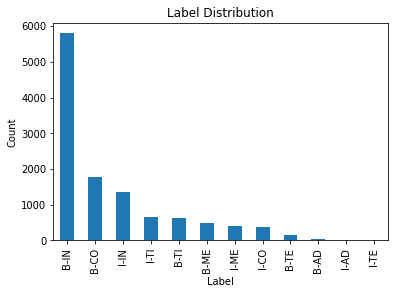

In [7]:
# Create the bar chart
label_dist[1:].plot(kind='bar')

# Add a title and axis labels
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the chart
plt.show()

Since the labels with the value AD(Add-ons) are very small compared to the other labels it might be best to ignore them for this model.


In [8]:
df['Label'] = df['Label'].replace(['B-AD', 'I-AD'], 'O')
label_dist = df['Label'].value_counts()
print(label_dist[1:])
non_o_labels = df['Label'].value_counts().sum() - df['Label'].value_counts()['O']
# Number of labels with an annotation
print(non_o_labels)

B-IN    5802
B-CO    1777
I-IN    1349
I-TI     670
B-TI     629
B-ME     490
I-ME     414
I-CO     376
B-TE     144
I-TE       3
Name: Label, dtype: int64
11654


Number of Unique Words


In [9]:
words = list(set(list(df['Word'].values)))
n_words = len(words)
n_words

2115

Number of Unique Labels

In [10]:
tags = list(set(df["Label"].values))
with open("tags", "wb") as fp:   #Pickling
  pickle.dump(tags, fp)

with open("tags", "rb") as fp:   
    tags = pickle.load(fp)
n_tags = len(tags)
n_tags

11

In [11]:
class ExampleGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),s["Label"].values.tolist())]
        self.grouped = self.data.groupby("Example #").apply(agg_func)
        self.examples = [s for s in self.grouped]
    
    def get_next(self):
        s = self.grouped["Example #: {}".format(self.n_sent)]
        self.n_sent += 1
        return s

In [12]:
getter = ExampleGetter(df)
examples = getter.examples
examples[0]

[('combine', 'O'),
 ('the', 'O'),
 ('paprika', 'B-IN'),
 ('oregano', 'B-IN'),
 ('thyme', 'B-IN'),
 ('garlic', 'B-IN'),
 ('powder', 'I-IN'),
 ('onion', 'B-IN'),
 ('powder', 'I-IN'),
 ('salt', 'B-IN'),
 ('and', 'O'),
 ('pepper', 'B-IN'),
 ('in', 'O'),
 ('a', 'O'),
 ('small', 'O'),
 ('bowl', 'B-CO'),
 ('coat', 'O'),
 ('both', 'O'),
 ('sides', 'O'),
 ('of', 'O'),
 ('the', 'O'),
 ('chicken', 'B-IN'),
 ('thighs', 'I-IN'),
 ('in', 'O'),
 ('the', 'O'),
 ('seasoning', 'O'),
 ('mix', 'O'),
 ('add', 'O'),
 ('1', 'B-ME'),
 ('Tbsp', 'I-ME'),
 ('cooking', 'B-IN'),
 ('oil', 'I-IN'),
 ('to', 'O'),
 ('a', 'O'),
 ('deep', 'O'),
 ('skillet', 'B-CO'),
 ('and', 'O'),
 ('heat', 'O'),
 ('over', 'O'),
 ('medium', 'O'),
 ('once', 'O'),
 ('hot', 'O'),
 ('swirl', 'O'),
 ('to', 'O'),
 ('coat', 'O'),
 ('the', 'O'),
 ('surface', 'O'),
 ('of', 'O'),
 ('the', 'O'),
 ('skillet', 'B-CO'),
 ('then', 'O'),
 ('add', 'O'),
 ('the', 'O'),
 ('chicken', 'B-IN'),
 ('thighs', 'I-IN'),
 ('cook', 'O'),
 ('the', 'O'),
 ('thighs', 

In [13]:
print("The number of examples in the training set:", len(examples))
max_len = max([len(examples[i]) for i in range(len(examples))])
max([len(examples[i]) for i in range(len(examples))])

The number of examples in the training set: 300


888

(array([18., 38., 61., 73., 58., 24., 17.,  6.,  3.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 22. ,  65.3, 108.6, 151.9, 195.2, 238.5, 281.8, 325.1, 368.4,
        411.7, 455. , 498.3, 541.6, 584.9, 628.2, 671.5, 714.8, 758.1,
        801.4, 844.7, 888. ]),
 <a list of 20 Patch objects>)

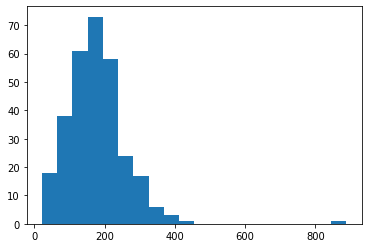

In [14]:
plt.hist([len(example) for example in examples], bins= 20)

In [15]:
def roundup(x):
  return int(math.ceil(x / 100.0)) * 100

In [16]:
max_len = roundup(max_len)
print(max_len)

900


In [17]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
with open("word2idx.json", "w") as outfile:
  json.dump(word2idx, outfile)
tag2idx = {t: i for i, t in enumerate(tags)}
with open("tag2idx.json", "w") as outfile:
  json.dump(tag2idx, outfile)


with open('word2idx.json', 'r') as fcc_file:
    word2idx = json.load(fcc_file)

with open('tag2idx.json', 'r') as fcc_file:
    tag2idx = json.load(fcc_file)


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in examples]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)

In [19]:
y = [[tag2idx[w[1]] for w in s] for s in examples]

y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])


In [20]:
from tensorflow.keras.utils import to_categorical

y = [to_categorical(i, num_classes=n_tags) for i in y]


In [21]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.15)

In [22]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(n_words+1, 2048, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=512, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=256, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(256)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_tags, activation='softmax'))
])

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 900, 2048)         4333568   
                                                                 
 bidirectional (Bidirectiona  (None, 900, 1024)        10489856  
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 900, 512)         2623488   
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 900, 256)         656384    
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 900, 256)         65792     
 ibuted)                                                

In [25]:
with tf.device('/GPU:0'):
  history = model.fit(X_tr, np.array(y_tr), batch_size=16, epochs=30, validation_split=0.15, verbose=1)

Epoch 1/30
14/14 [==============================] - 30s 683ms/step - loss: 0.4344 - accuracy: 0.9458 - val_loss: 0.1943 - val_accuracy: 0.9536
Epoch 2/30
14/14 [==============================] - 7s 538ms/step - loss: 0.1699 - accuracy: 0.9579 - val_loss: 0.1793 - val_accuracy: 0.9537
Epoch 3/30
14/14 [==============================] - 8s 543ms/step - loss: 0.1548 - accuracy: 0.9582 - val_loss: 0.1659 - val_accuracy: 0.9542
Epoch 4/30
14/14 [==============================] - 8s 547ms/step - loss: 0.1412 - accuracy: 0.9595 - val_loss: 0.1526 - val_accuracy: 0.9552
Epoch 5/30
14/14 [==============================] - 8s 554ms/step - loss: 0.1257 - accuracy: 0.9609 - val_loss: 0.1355 - val_accuracy: 0.9572
Epoch 6/30
14/14 [==============================] - 8s 559ms/step - loss: 0.1086 - accuracy: 0.9629 - val_loss: 0.1167 - val_accuracy: 0.9600
Epoch 7/30
14/14 [==============================] - 8s 585ms/step - loss: 0.0830 - accuracy: 0.9694 - val_loss: 0.0858 - val_accuracy: 0.9719
Epoch

In [26]:
model.save('ner_model_30e.h5')


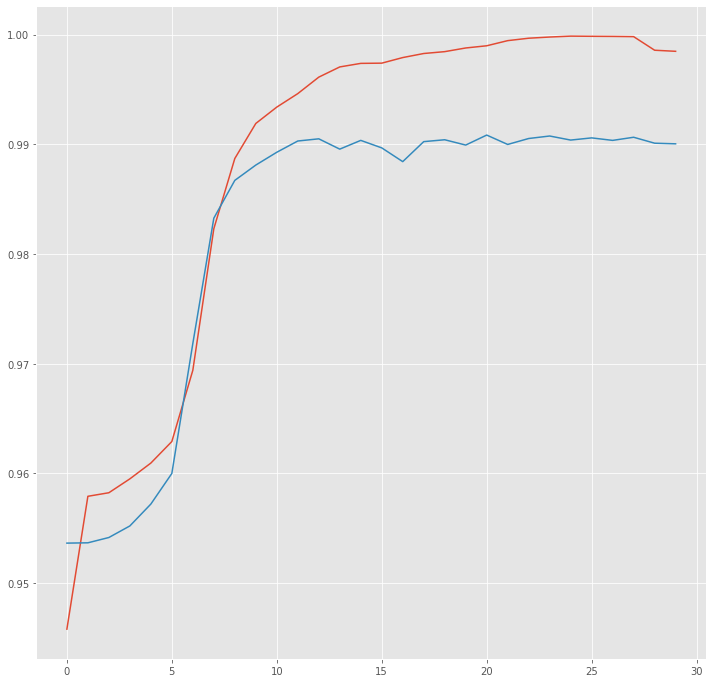

In [27]:
hist = pd.DataFrame(history.history)
plt.style.use("ggplot")
plt.figure(figsize=(12, 12))
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.show()

In [28]:
import tensorflow as tf

new_model = tf.keras.models.load_model('ner_model_30e.h5')


co stands for cookware

te stands for temperature

in stands for ingredient

me stands for measurement

ti stands for time

O stands for no label

Evaluation

In [29]:
metrics = ["true_positive", "false_positive", "false_negative"]
confusion_matrix_dict = {tag_idx:{metric_idx:0 for metric_idx in metrics} for tag_idx in tag2idx.keys()}
for i in range(len(X_te)):
  p = new_model.predict(np.array([X_te[i]]))
  p = np.argmax(p, axis=-1)
  true = np.argmax(y_te[i], -1)
  print("{}||{}||{}".format("Word", "True", "Pred"))
  print(30 * "=")
  for w, t, pred in zip(X_te[i], true, p[0]):
      if w != 0:
          print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))
          if tags[pred] ==  tags[t]:
            confusion_matrix_dict[tags[pred]]["true_positive"] += 1
          elif tags[pred] != tags[t]:
            confusion_matrix_dict[tags[pred]]["false_positive"] += 1
            confusion_matrix_dict[tags[t]]["false_negative"] += 1

          

Streaming output truncated to the last 5000 lines.
let            : O     O
the            : O     O
batter         : O     O
rest           : O     O
for            : O     O
15             : B-TI  B-TI
minutes        : I-TI  I-TI
heat           : O     O
a              : O     O
large          : O     O
skillet        : B-CO  B-CO
or             : O     O
griddle        : B-CO  O
over           : O     O
medium         : O     O
once           : O     O
hot            : O     O
add            : O     O
enough         : O     O
cooking        : B-IN  O
oil            : I-IN  B-IN
to             : O     O
coat           : O     O
the            : O     O
surface        : O     O
i              : O     O
use            : O     O
about          : O     O
½              : B-ME  B-ME
tsp            : I-ME  I-ME
per            : O     O
pancake        : O     O
add            : O     O
the            : O     O
pancake        : O     O
batter         : O     O
to             : O     O
the   

Combine Values for 

In [30]:
metrics_dict = {}
for tag, metrics in confusion_matrix_dict.items():
  label = tag[2:]
  if label == "":
    metrics_dict['O'] = metrics
  elif label not in metrics_dict.keys():
    metrics_dict[label] = metrics
  else:
    for metric, value in metrics.items():
      metrics_dict[label][metric] += value


In [31]:
machine_learning_metrics = ["Precision", "Recall", "f1_score"]
NER_metrics = {}
for tag, metrics in metrics_dict.items():
  for metric, value in metrics.items():
    tp = metrics_dict[tag]["true_positive"]
    fp = metrics_dict[tag]["false_positive"]
    fn = metrics_dict[tag]["false_negative"]
    precision = round(tp/(tp+fp), 2)
    recall = round(tp/(tp+fn), 2)
    f1_score = round((2*(precision*recall))/(precision+recall), 2)
  NER_metrics[tag] = {"Precision": precision, "Recall": recall, "F1_Score": f1_score}

In [32]:
print(json.dumps(NER_metrics,sort_keys=True, indent=4))

{
    "CO": {
        "F1_Score": 0.83,
        "Precision": 0.84,
        "Recall": 0.82
    },
    "IN": {
        "F1_Score": 0.88,
        "Precision": 0.89,
        "Recall": 0.88
    },
    "ME": {
        "F1_Score": 0.82,
        "Precision": 0.93,
        "Recall": 0.74
    },
    "O": {
        "F1_Score": 0.97,
        "Precision": 0.97,
        "Recall": 0.98
    },
    "TE": {
        "F1_Score": 0.92,
        "Precision": 0.96,
        "Recall": 0.88
    },
    "TI": {
        "F1_Score": 0.9,
        "Precision": 0.92,
        "Recall": 0.89
    }
}


References:

1. https://www.depends-on-the-definition.com/sequence-tagging-lstm-crf/

2. https://www.kaggle.com/code/naseralqaydeh/named-entity-recognition-ner-with-tensorflow/notebook
